# Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. --y =salary & x= year of experience

In [24]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv(r'D:\Data science\Assignments\uploaded on github\Simple Linear Regression\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Visualization

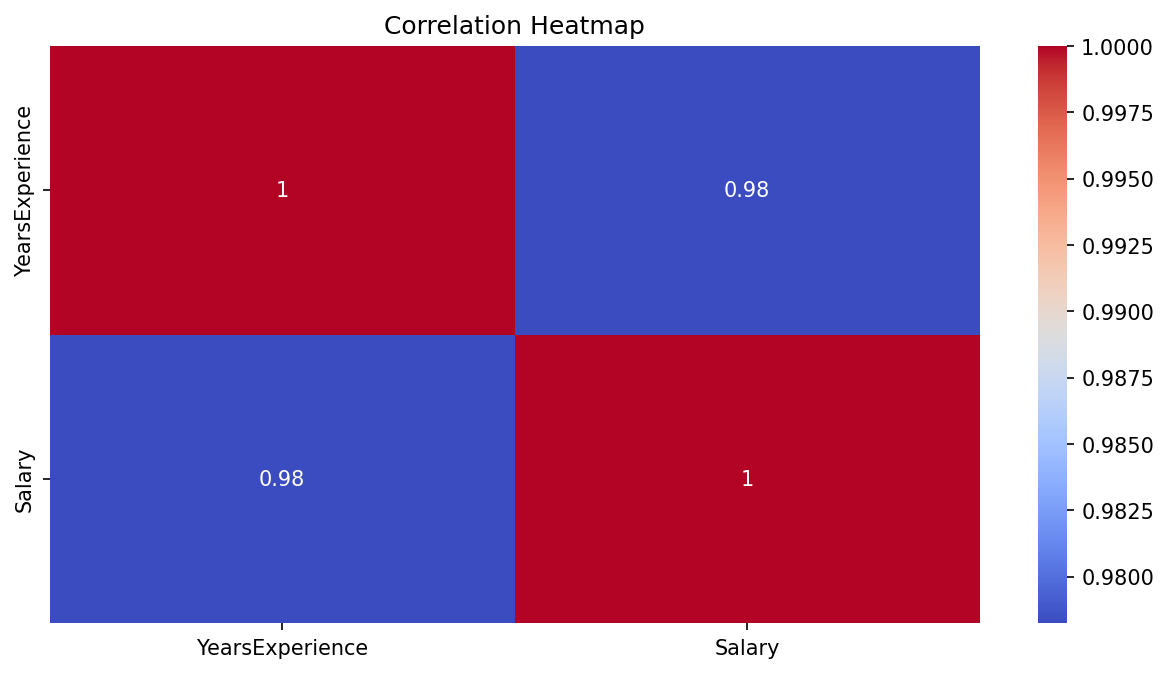

In [9]:
# Correlation heatmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

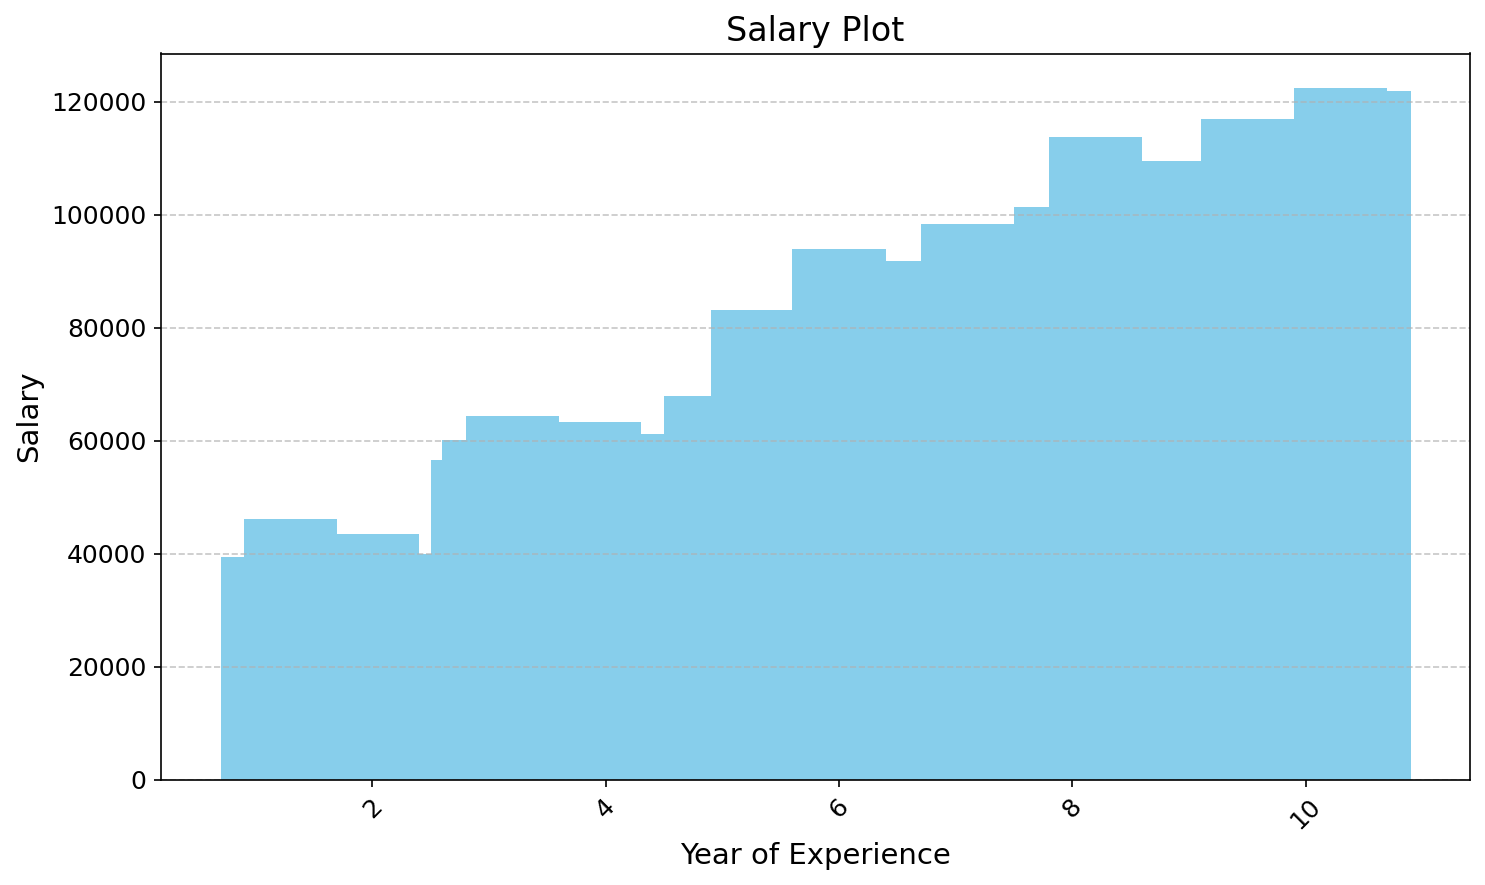

In [19]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(df['YearsExperience'], df['Salary'], color='skyblue')  # Create the bar plot

# Add a title and labels
plt.title('Salary Plot', fontsize=16)
plt.xlabel('Year of Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


# Correlation analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

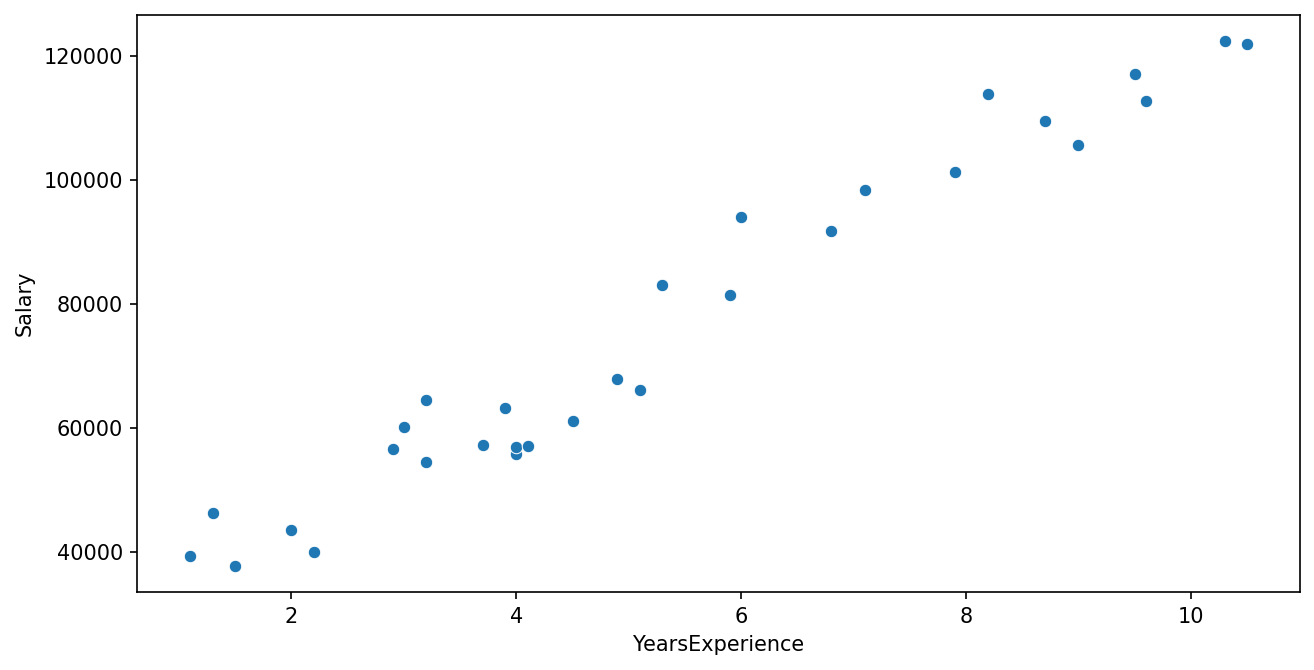

In [22]:
sns.scatterplot(x = df['YearsExperience'],y = df['Salary'])

# Distribution of the data and skewness

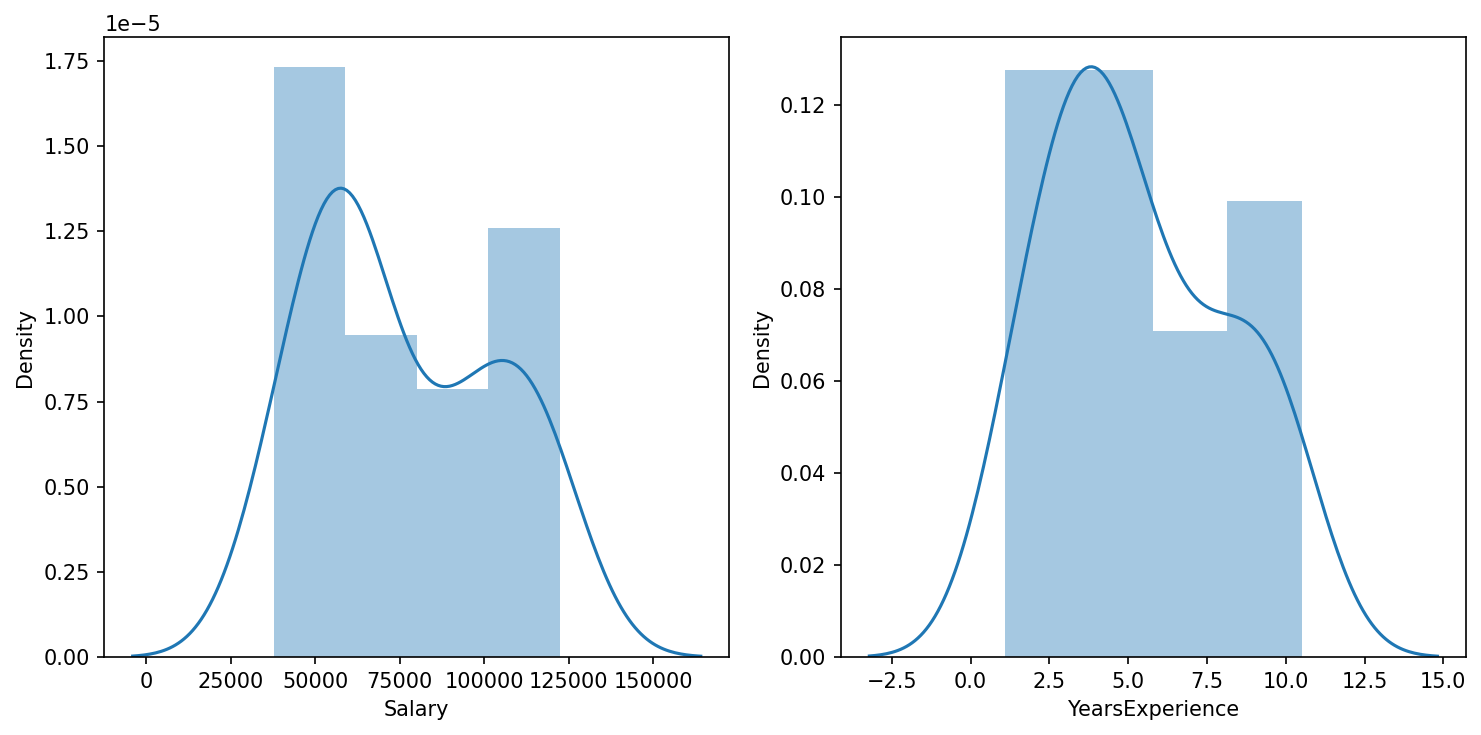

In [30]:
# Distribution of the data
df.head()
plt.subplot(1,2,1)
sns.distplot(df['Salary'])

plt.subplot(1,2,2)
sns.distplot(df['YearsExperience'])

plt.tight_layout()

In [33]:
df['Salary'].skew()

0.35411967922959153

In [34]:
df['YearsExperience'].skew()

0.37956024064804106

# Model Building

In [25]:
model = smf.ols('Salary~YearsExperience',data=df).fit()
model

In [26]:
#Model parameters (slope, intercept)
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
#Print p value
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [28]:
#Model Evaluation
#r2 value
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Data Transformation

# Log Transformation

In [36]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
np.log(df['Salary'])

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

In [38]:
df['log_Salary'] = np.log(df['Salary'])
df

,YearsExperience,Salary,log_Salary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906
5,2.9,56642.0,10.944506
6,3.0,60150.0,11.004597
7,3.2,54445.0,10.904946
8,3.2,64445.0,11.073567
9,3.7,57189.0,10.954117


In [39]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df

,YearsExperience,Salary,log_Salary,log_YearsExperience
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457
5,2.9,56642.0,10.944506,1.064711
6,3.0,60150.0,11.004597,1.098612
7,3.2,54445.0,10.904946,1.163151
8,3.2,64445.0,11.073567,1.163151
9,3.7,57189.0,10.954117,1.308333


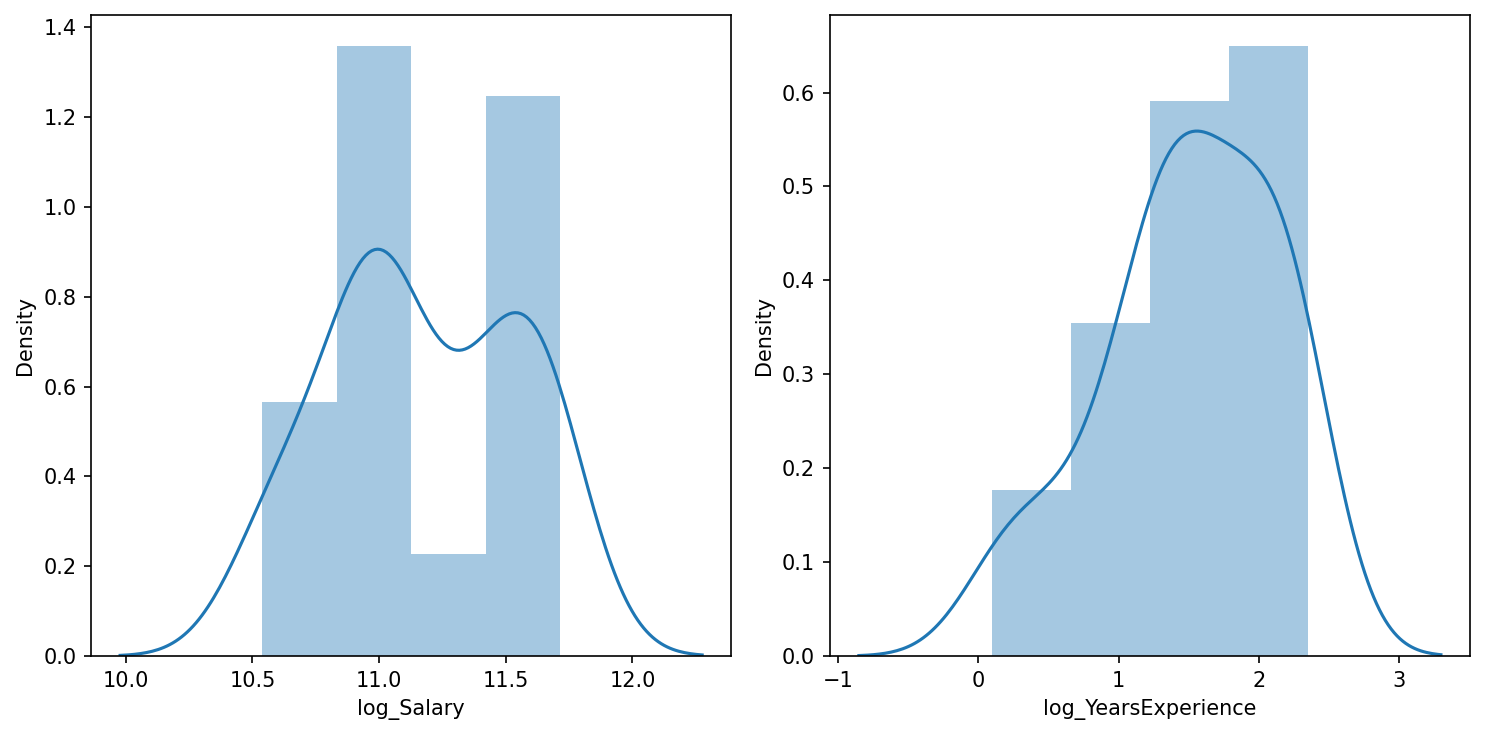

In [40]:
plt.subplot(1,2,1)
sns.distplot(df['log_Salary'])

plt.subplot(1,2,2)
sns.distplot(df['log_YearsExperience'])

plt.tight_layout()

In [41]:
df['log_Salary'].skew(), df['log_YearsExperience'].skew()

(-0.044126086756988495, -0.6005648582626513)

# Sqrt transformation

In [43]:
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])
df

,YearsExperience,Salary,log_Salary,log_YearsExperience,sqrt_Salary,sqrt_YearsExperience
0,1.1,39343.0,10.580073,0.095310,198.350700,1.048809
1,1.3,46205.0,10.740843,0.262364,214.953483,1.140175
2,1.5,37731.0,10.538237,0.405465,194.244691,1.224745
3,2.0,43525.0,10.681091,0.693147,208.626460,1.414214
4,2.2,39891.0,10.593906,0.788457,199.727314,1.483240
5,2.9,56642.0,10.944506,1.064711,237.995798,1.702939
6,3.0,60150.0,11.004597,1.098612,245.254969,1.732051
7,3.2,54445.0,10.904946,1.163151,233.334524,1.788854
8,3.2,64445.0,11.073567,1.163151,253.860198,1.788854
9,3.7,57189.0,10.954117,1.308333,239.142217,1.923538


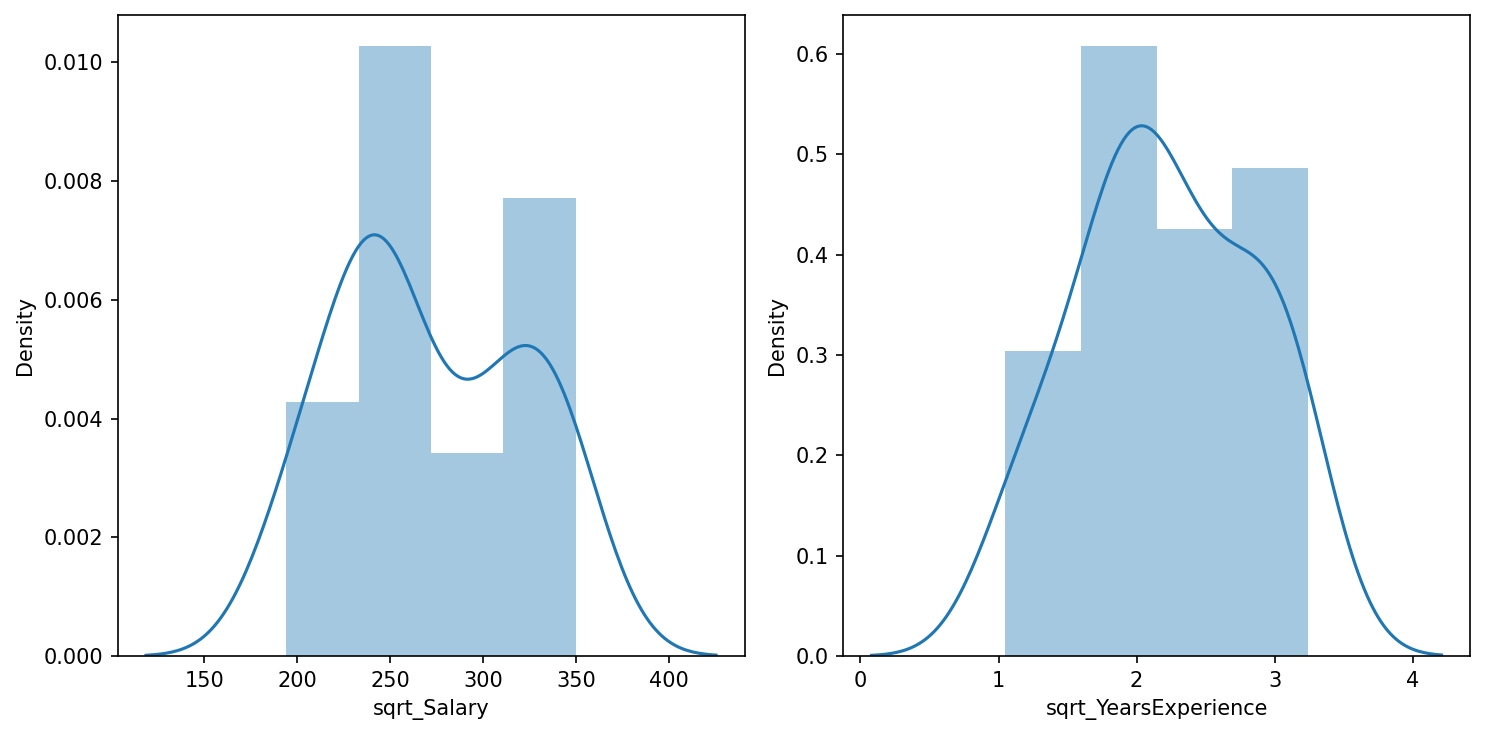

In [44]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Salary'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_YearsExperience'])

plt.tight_layout()

In [45]:
df['sqrt_Salary'].skew()

0.16904336802767353

In [46]:
df['sqrt_YearsExperience'].skew()

-0.04919608394250605